In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
#path = 'binary_DELTA_median_data_reduced.csv'
path = 'median_delta_20pc.csv'
df = pd.read_csv(path)
df

,d_temp,d_ph,d_salinity,d_feed_given,d_weight,target
0,0.0,0.00,0.0,0.0,0.00,0
1,0.0,0.00,0.0,-4.0,0.00,0
2,2.8,0.17,-1.0,0.0,2.20,0
3,0.9,-1.70,3.0,0.0,-1.43,1
4,-1.6,0.70,-2.9,4.0,0.12,0
...,...,...,...,...,...,...
73,0.3,-0.60,7.2,0.0,-0.81,1
74,-1.4,-0.50,-4.0,0.0,1.70,0
75,1.9,1.30,1.8,0.0,-2.09,1
76,-0.4,-0.40,-15.1,38.0,0.60,0


In [9]:
df.target.value_counts()

0    47
1    31
Name: target, dtype: int64

# Decision Tree

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['Delta(Artemia weight [g/l])'], 
                                                   test_size=0.1, random_state=42)

In [6]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [7]:
preds = tree_reg.predict(x_test)
mean_absolute_error(y_test, preds)

2.1637500000000003

In [71]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['0_1 Delta(Artemia weight [g/l])'], 
                                                   test_size=0.2, random_state=42)

In [72]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
acc = tree_clf.score(x_test, y_test)
print(acc)

0.7333333333333333


In [74]:
tree_clf.feature_importances_

array([0.51573891, 0.06628788, 0.2203722 , 0.19760101])

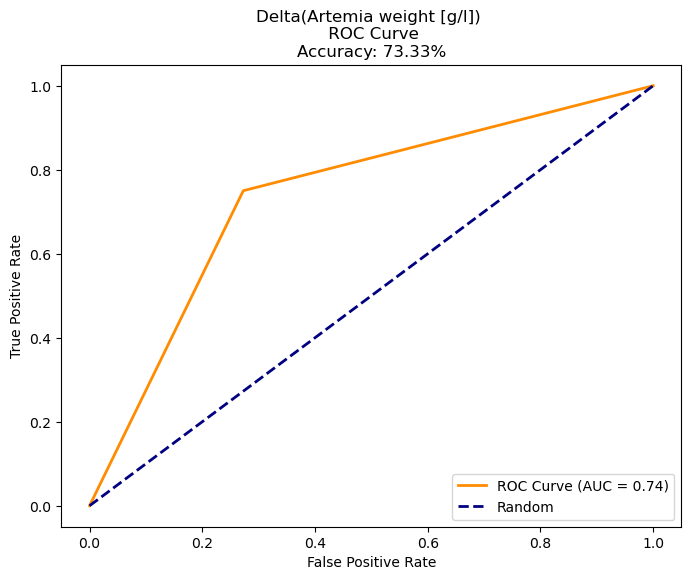

In [75]:
y_prob = tree_clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Delta(Artemia weight [g/l]) \n ROC Curve\nAccuracy: {:.2f}%'.format(
    acc * 100))
plt.legend(loc="lower right")
plt.show()

## Same with wet weight

In [66]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['0_1 Delta(Individual weight wet [mg/animal])'], 
                                                   test_size=0.1, random_state=42)

In [67]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
acc = tree_clf.score(x_test, y_test)
print(acc)

0.625


In [69]:
tree_clf.feature_importances_

array([0.23798541, 0.13361823, 0.32326552, 0.30513084])

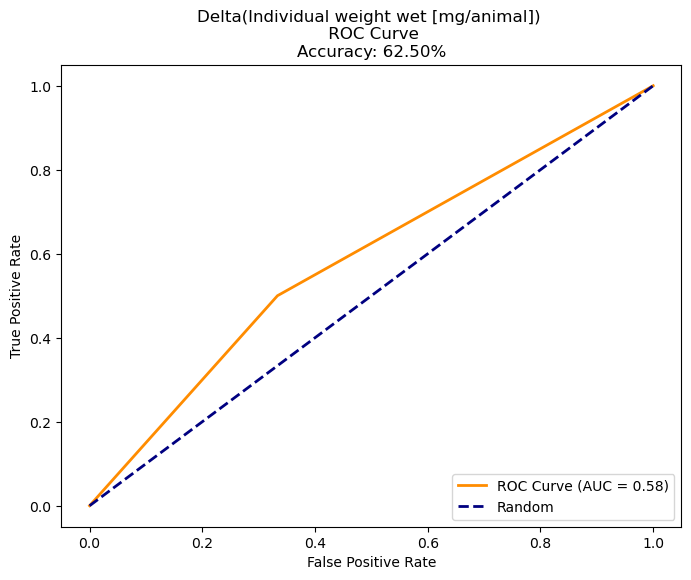

In [70]:
y_prob = tree_clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Delta(Individual weight wet [mg/animal]) \n ROC Curve\nAccuracy: {:.2f}%'.format(
    acc * 100))
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['Delta(Artemia weight [g/l])'], 
                                                   test_size=0.2, random_state=42)

In [44]:
tree_reg = RandomForestRegressor()
tree_reg.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
preds = tree_reg.predict(x_test)
mean_absolute_error(y_test, preds)

2.00588

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['0_1 Delta(Artemia weight [g/l])'], 
                                                   test_size=0.2, random_state=42)

In [57]:
tree_clf = RandomForestClassifier()
tree_clf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
acc = tree_clf.score(x_test, y_test)
print(acc)

0.8


In [59]:
tree_clf.feature_importances_

array([0.42300055, 0.27724355, 0.1242677 , 0.17548821])

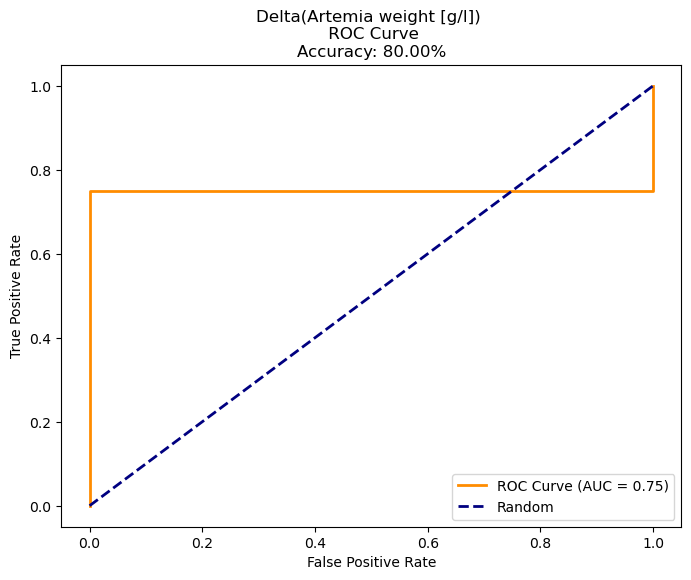

In [60]:
y_prob = tree_clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Delta(Artemia weight [g/l]) \n ROC Curve\nAccuracy: {:.2f}%'.format(
    acc * 100))
plt.legend(loc="lower right")
plt.show()

## Same with wet weight

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['0_1 Delta(Individual weight wet [mg/animal])'], 
                                                   test_size=0.2, random_state=42)

In [62]:
tree_clf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
acc = tree_clf.score(x_test, y_test)
print(acc)

0.8


In [64]:
tree_clf.feature_importances_

array([0.23351089, 0.23802941, 0.16038967, 0.36807003])

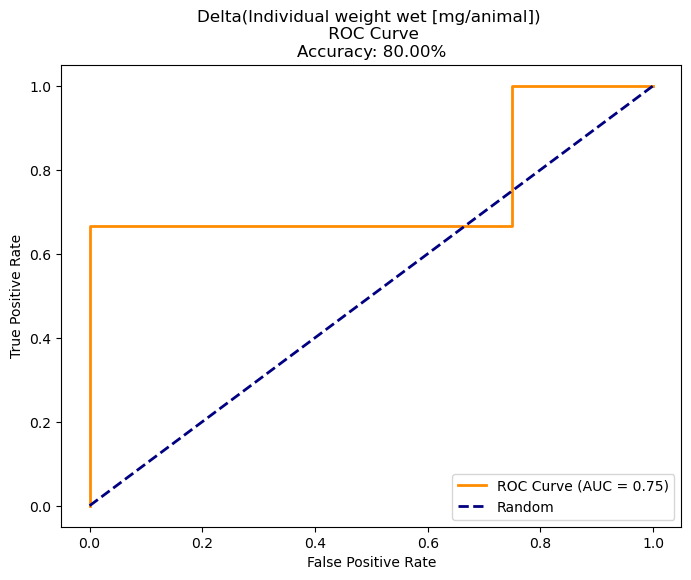

In [65]:
y_prob = tree_clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Delta(Individual weight wet [mg/animal]) \n ROC Curve\nAccuracy: {:.2f}%'.format(
    acc * 100))
plt.legend(loc="lower right")
plt.show()

# Compare some algorithms

LR: 0.493333 (0.302508)
LDA: 0.373333 (0.339869)
KNN: 0.580476 (0.139962)
DT: 0.670909 (0.188187)
NB: 0.394444 (0.288386)
SVM: 0.366667 (0.305505)
RF: 0.717143 (0.218386)


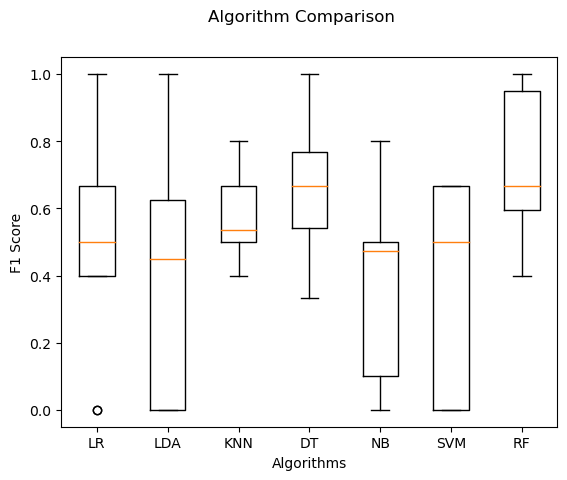

In [10]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

x, y = df.iloc[:, :4], df.target

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_f1_median_20pc.png')
plt.show()

LR: 0.515714 (0.264696)
LDA: 0.539524 (0.257839)
KNN: 0.545000 (0.241299)
DT: 0.683175 (0.186136)
NB: 0.370317 (0.180716)
SVM: 0.605714 (0.264411)
RF: 0.710079 (0.176241)


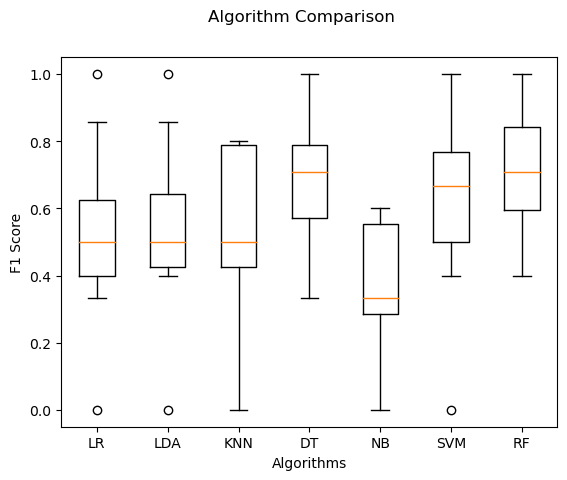

In [15]:
x, y = df.iloc[:, :4], df['0_1 Delta(Individual weight wet [mg/animal])']

results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_wet_weight_f1_median.png')
plt.show()

LR: 0.740833 (0.238469)
LDA: 0.697500 (0.237604)
KNN: 0.822917 (0.149435)
DT: 0.759375 (0.145718)
NB: 0.600000 (0.235297)
SVM: 0.769583 (0.213470)
RF: 0.875000 (0.141605)


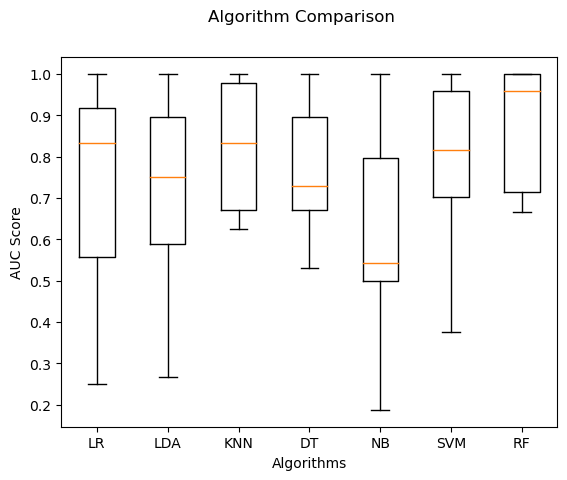

In [11]:
x, y = df.iloc[:, :4], df.target

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_auc_median_20pc.png')
plt.show()

LR: 0.696250 (0.212496)
LDA: 0.701667 (0.223041)
KNN: 0.805625 (0.175268)
DT: 0.724167 (0.121189)
NB: 0.577500 (0.209167)
SVM: 0.786667 (0.225807)
RF: 0.847500 (0.136323)


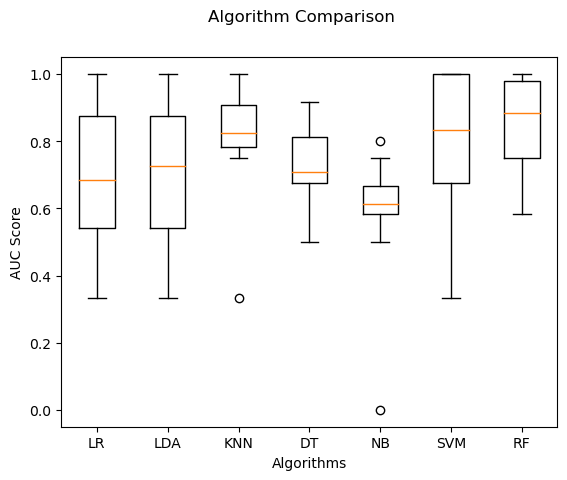

In [117]:
x, y = df.iloc[:, :4], df['0_1 Delta(Individual weight wet [mg/animal])']

results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_wet_weight_auc_median.png')
plt.show()

# MAE

LR: -1.816861 (0.515484)
KNN: -1.465416 (0.324485)
DT: -1.426196 (0.405336)
SVM: -1.491086 (0.356738)
RF: -1.253016 (0.388933)


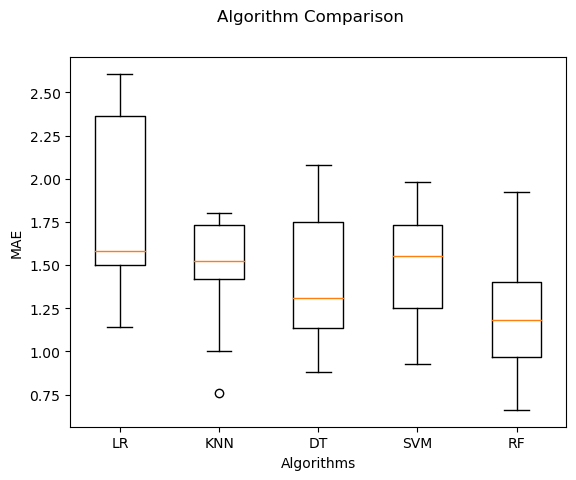

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

x, y = df.iloc[:, :4], df['Delta(Artemia weight [g/l])']

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LinearRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(-1*cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('MAE')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_mae_median.png')
plt.show()

LR: -0.231033 (0.089559)
KNN: -0.199612 (0.075104)
DT: -0.193661 (0.094535)
SVM: -0.159302 (0.063207)
RF: -0.171706 (0.070216)


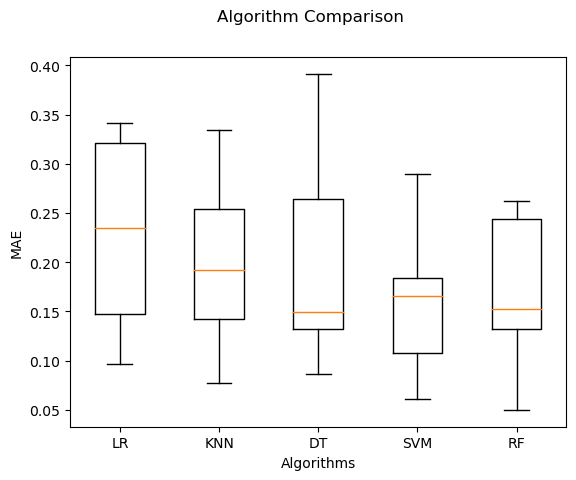

In [13]:
x, y = df.iloc[:, :4], df['Delta(Individual weight wet [mg/animal])']

results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(-1*cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('MAE')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_wet_weight_mae_median.png')
plt.show()

# Mean Dataset version

In [3]:
df = pd.read_csv('binary_DELTA_mean_data_reduced.csv')
df

,Delta_Temp,Delta_pH,Delta_Actual_feed_ration_given,Delta_Salinity,Delta(Artemia weight [g/l]),Delta(Individual weight wet [mg/animal]),day_of_exp,0_1 Delta(Artemia weight [g/l]),0_1 Delta(Individual weight wet [mg/animal])
0,0.370731,-0.008688,-3.546343,-0.071097,0.249026,-0.004432,1.0,0,1
1,2.567429,-0.004599,0.107343,-0.561876,1.727997,-0.026664,2.0,0,1
2,0.491551,-1.382969,0.414362,2.194165,-1.245554,0.153794,3.0,1,0
3,-0.766461,0.641276,2.841152,-2.072016,0.034358,-0.047058,4.0,0,1
4,5.040072,0.540021,-2.846708,2.699331,1.050123,0.152289,5.0,0,0
...,...,...,...,...,...,...,...,...,...
70,0.300000,-0.600000,0.000000,7.200000,-0.810000,-0.060000,99.0,1,1
71,-1.400000,-0.500000,0.000000,-4.000000,1.700000,-0.160000,100.0,0,1
72,1.900000,1.300000,0.000000,1.800000,-2.090000,0.130000,101.0,1,0
73,-0.400000,-0.400000,38.000000,-15.100000,0.600000,0.420000,103.0,0,0


LR: 0.450476 (0.254191)
LDA: 0.400476 (0.286637)
KNN: 0.532381 (0.267183)
DT: 0.635476 (0.148902)
NB: 0.482143 (0.139830)
SVM: 0.352381 (0.247161)
RF: 0.592734 (0.194378)


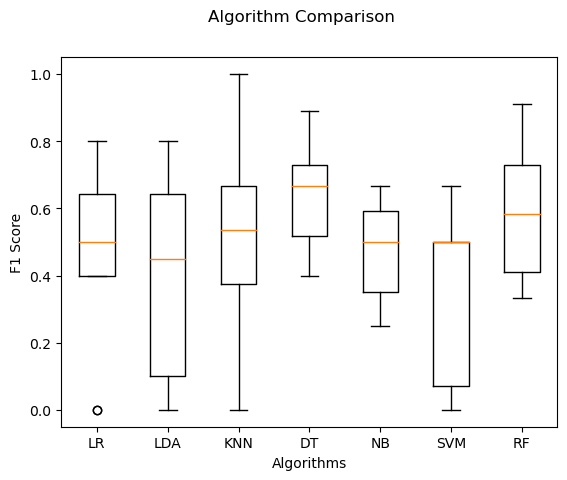

In [119]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

x, y = df.iloc[:, :4], df['0_1 Delta(Artemia weight [g/l])']

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_f1_mean.png')
plt.show()

LR: 0.587619 (0.262486)
LDA: 0.449048 (0.213289)
KNN: 0.621905 (0.222001)
DT: 0.564048 (0.168407)
NB: 0.464365 (0.168628)
SVM: 0.599524 (0.275931)
RF: 0.544286 (0.189904)


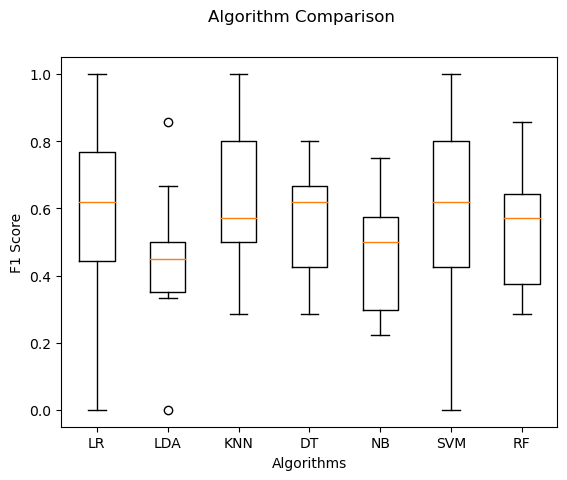

In [120]:
x, y = df.iloc[:, :4], df['0_1 Delta(Individual weight wet [mg/animal])']

results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_wet_weight_f1_mean.png')
plt.show()

LR: 0.766667 (0.140831)
LDA: 0.760000 (0.141264)
KNN: 0.668333 (0.228759)
DT: 0.682500 (0.133773)
NB: 0.635000 (0.150268)
SVM: 0.690000 (0.186369)
RF: 0.761667 (0.153125)


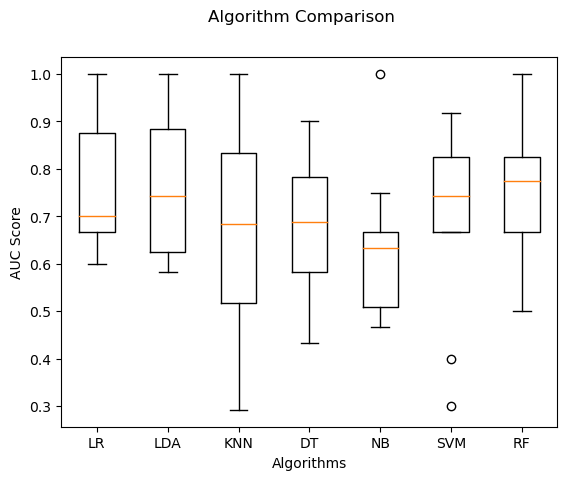

In [121]:
x, y = df.iloc[:, :4], df['0_1 Delta(Artemia weight [g/l])']

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_auc_mean.png')
plt.show()

LR: 0.709167 (0.262743)
LDA: 0.686250 (0.300648)
KNN: 0.728333 (0.227044)
DT: 0.625833 (0.171369)
NB: 0.490833 (0.244792)
SVM: 0.778750 (0.226526)
RF: 0.733333 (0.185592)


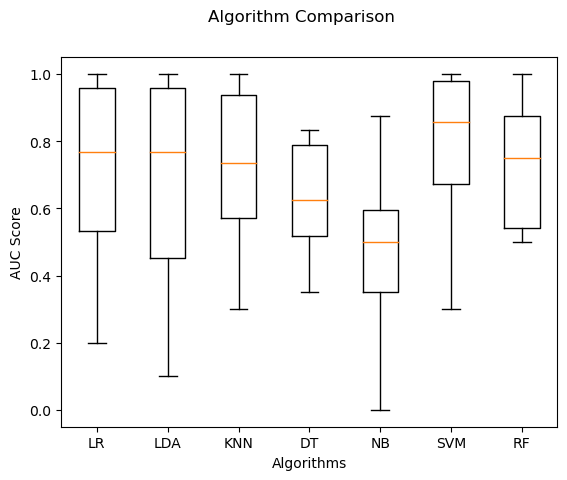

In [122]:
x, y = df.iloc[:, :4], df['0_1 Delta(Individual weight wet [mg/animal])']

results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_wet_weight_auc_mean.png')
plt.show()

# MAE

LR: -1.610230 (0.399791)
KNN: -1.267969 (0.344858)
DT: -1.736868 (0.327859)
SVM: -1.420893 (0.311828)
RF: -1.437241 (0.344099)


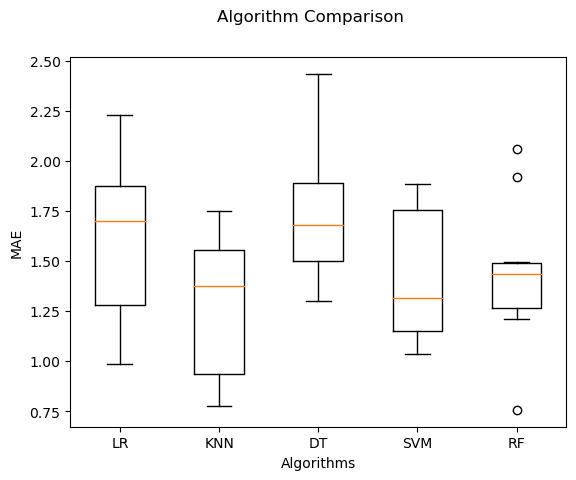

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

x, y = df.iloc[:, :4], df['Delta(Artemia weight [g/l])']

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LinearRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(-1*cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('MAE')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_mae_median.png')
plt.show()

LR: -0.227831 (0.096375)
KNN: -0.174182 (0.070142)
DT: -0.262140 (0.145906)
SVM: -0.178920 (0.067480)
RF: -0.191222 (0.063816)


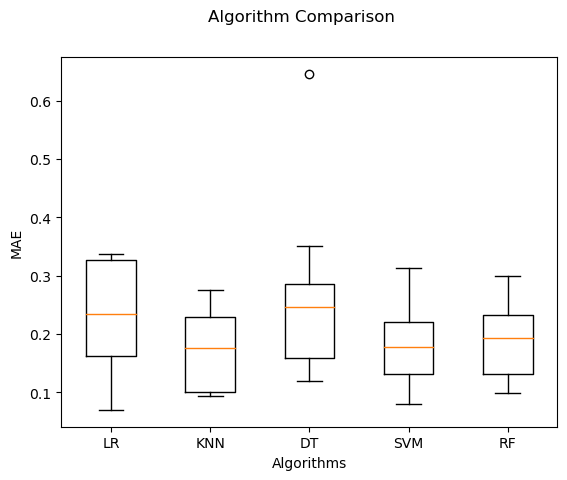

In [18]:
x, y = df.iloc[:, :4], df['Delta(Individual weight wet [mg/animal])']

results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(-1*cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('MAE')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_wet_weight_mae_median.png')
plt.show()

# Some comparisons of the variables that produce the 20% negative change

In [6]:
df_neg = df[df.target == 1]
df_neg

,d_temp,d_ph,d_salinity,d_feed_given,d_weight,target
3,0.90,-1.70,3.00,0.0,-1.430,1
6,-6.10,-0.50,-2.50,5.0,0.240,1
7,0.30,-0.30,-0.80,-5.0,-4.420,1
12,2.10,-0.90,-1.90,0.0,-4.820,1
17,0.70,0.30,-1.30,-4.0,-5.130,1
19,-1.00,0.03,-1.20,0.0,-2.620,1
21,0.00,0.00,0.00,0.0,0.000,1
22,0.90,-1.70,3.00,0.0,-1.430,1
25,-6.10,-0.50,-2.50,5.0,0.240,1
26,-1.40,0.90,-0.50,-5.0,-2.480,1


In [7]:
df_neg = df_neg.reset_index(drop=True)
df_neg

,d_temp,d_ph,d_salinity,d_feed_given,d_weight,target
0,0.90,-1.70,3.00,0.0,-1.430,1
1,-6.10,-0.50,-2.50,5.0,0.240,1
2,0.30,-0.30,-0.80,-5.0,-4.420,1
3,2.10,-0.90,-1.90,0.0,-4.820,1
4,0.70,0.30,-1.30,-4.0,-5.130,1
5,-1.00,0.03,-1.20,0.0,-2.620,1
6,0.00,0.00,0.00,0.0,0.000,1
7,0.90,-1.70,3.00,0.0,-1.430,1
8,-6.10,-0.50,-2.50,5.0,0.240,1
9,-1.40,0.90,-0.50,-5.0,-2.480,1


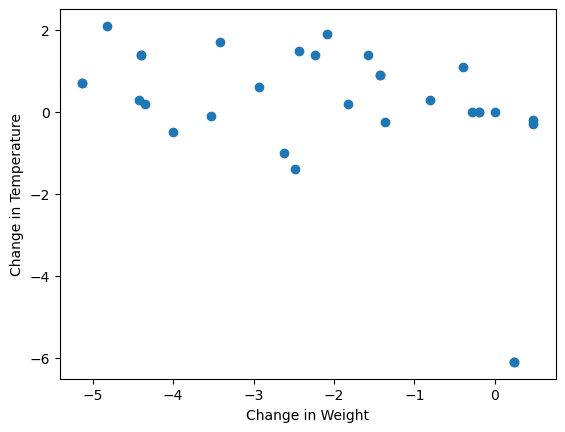

In [7]:
plt.scatter(x = df_neg.d_weight, y = df_neg.d_temp)
plt.xlabel('Change in Weight')
plt.ylabel('Change in Temperature')
plt.show()

# Need to examine this

In [8]:
def quart(col, df = df_neg):
    quartiles = df[col].quantile([.25, .75])
    iqr = quartiles[.75]-quartiles[.25]
    print(f'{col} IQR = {iqr}')
    quarts = []
    print(f"Q1 = {quartiles[.25]}\nQ3 = {quartiles[.75]}\n")
    for i in range(len(df[col])):
        if (i > iqr-1.5*quartiles[.25]) or (i < iqr+1.5*quartiles[.75]):
            quarts.append(i)
        else:
            continue
    return iqr, quarts

In [9]:
iqr, quarts = quart('d_weight')

d_weight IQR = 3.4224999999999994
Q1 = -3.7624999999999997
Q3 = -0.3400000000000001



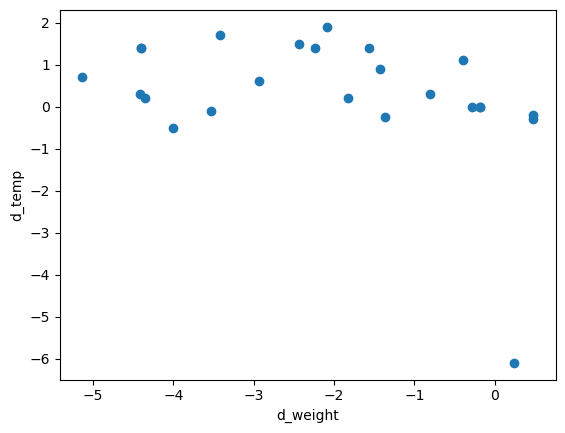

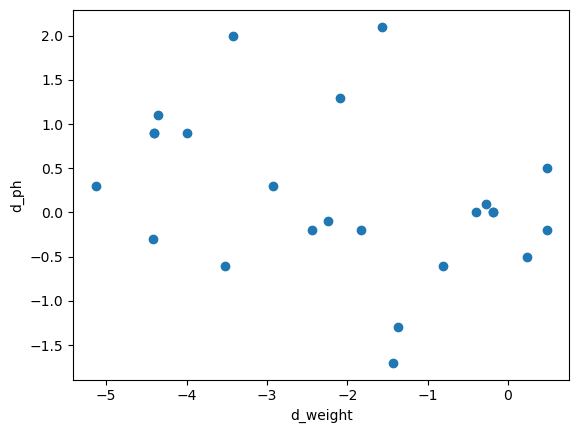

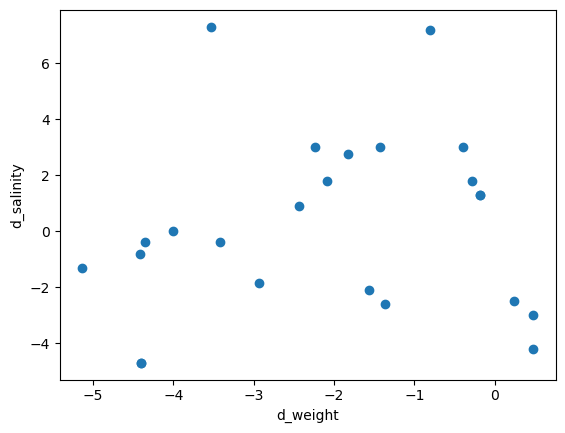

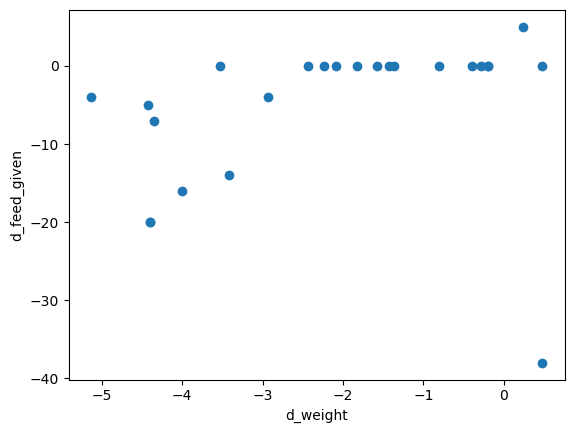

In [11]:
for col in df.columns[:-2]:
    x = df_neg.loc[quarts, 'd_weight']
    y = df_neg.loc[quarts, col]
    plt.scatter(x = x, y = y)
    plt.xlabel(f'd_weight')
    plt.ylabel(f'{col}')
    plt.savefig(f'feature_investigation/d_weight_{col}_scatter.png')
    plt.show()

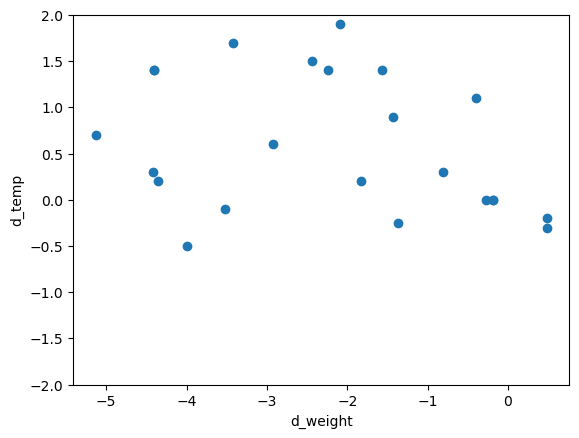

In [21]:
x = df_neg.loc[quarts, 'd_weight']
y = df_neg.loc[quarts, 'd_temp']
plt.scatter(x = x, y = y)
plt.xlabel('d_weight')
plt.ylabel('d_temp')
plt.ylim([-2, 2])
plt.savefig(f'feature_investigation/d_weight_d_temp_square.png')
plt.show()

In [10]:
df_pos = df[df.target == 0]
df_pos

,d_temp,d_ph,d_salinity,d_feed_given,d_weight,target
0,0.00,0.00,0.00,0.0,0.000,0
1,0.00,0.00,0.00,-4.0,0.000,0
2,2.80,0.17,-1.00,0.0,2.200,0
4,-1.60,0.70,-2.90,4.0,0.120,0
5,6.80,0.70,3.50,-4.0,1.090,0
8,-0.70,0.30,-0.50,0.0,0.000,0
9,0.10,0.00,3.00,0.0,0.000,0
10,0.50,-0.20,-1.20,0.0,0.000,0
11,-2.00,0.80,0.60,0.0,4.820,0
13,-0.70,0.30,-0.50,0.0,0.000,0


In [11]:
df_pos = df_pos.reset_index(drop=True)
df_pos

,d_temp,d_ph,d_salinity,d_feed_given,d_weight,target
0,0.00,0.00,0.00,0.0,0.000,0
1,0.00,0.00,0.00,-4.0,0.000,0
2,2.80,0.17,-1.00,0.0,2.200,0
3,-1.60,0.70,-2.90,4.0,0.120,0
4,6.80,0.70,3.50,-4.0,1.090,0
5,-0.70,0.30,-0.50,0.0,0.000,0
6,0.10,0.00,3.00,0.0,0.000,0
7,0.50,-0.20,-1.20,0.0,0.000,0
8,-2.00,0.80,0.60,0.0,4.820,0
9,-0.70,0.30,-0.50,0.0,0.000,0


In [12]:
iqr_pos, quarts_pos = quart('d_weight', df_pos)

d_weight IQR = 2.43
Q1 = 0.0
Q3 = 2.43



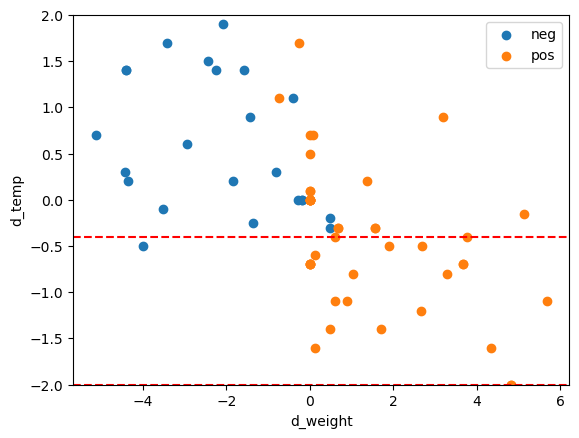

In [20]:
x = df_neg.loc[quarts, 'd_weight']
y = df_neg.loc[quarts, 'd_temp']
plt.scatter(x = x, y = y, label = 'neg')
x = df_pos.loc[quarts_pos, 'd_weight']
y = df_pos.loc[quarts_pos, 'd_temp']  
plt.scatter(x = x, y = y, label = 'pos')
plt.xlabel('d_weight')
plt.ylabel('d_temp')
plt.axhline(y=-0.4, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.legend()
plt.ylim([-2, 2])
plt.savefig(f'feature_investigation/d_weight_d_temp_square.png')
plt.show()

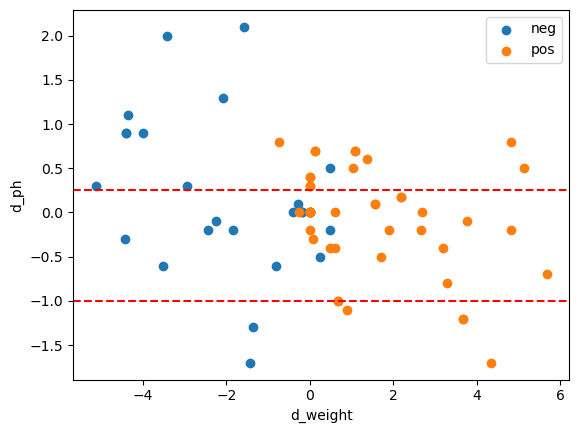

In [18]:
col = 'd_ph'
x = df_neg.loc[quarts, 'd_weight']
y = df_neg.loc[quarts, col]
plt.scatter(x = x, y = y, label = 'neg')
x = df_pos.loc[quarts_pos, 'd_weight']
y = df_pos.loc[quarts_pos, col]  
plt.scatter(x = x, y = y, label = 'pos')
plt.xlabel('d_weight')
plt.ylabel(col)
plt.axhline(y=0.25, color='r', linestyle='--')
plt.axhline(y=-1, color='r', linestyle='--')
plt.legend()
#plt.ylim([-2, 2])
plt.savefig(f'feature_investigation/d_weight_{col}_square.png')
plt.show()

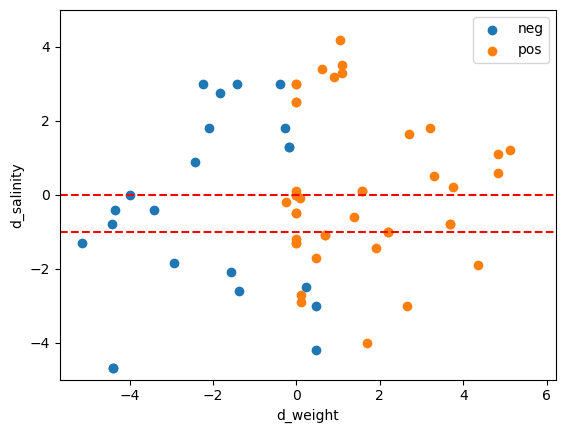

In [19]:
col = 'd_salinity'
x = df_neg.loc[quarts, 'd_weight']
y = df_neg.loc[quarts, col]
plt.scatter(x = x, y = y, label = 'neg')
x = df_pos.loc[quarts_pos, 'd_weight']
y = df_pos.loc[quarts_pos, col]  
plt.scatter(x = x, y = y, label = 'pos')
plt.xlabel('d_weight')
plt.ylabel(col)
plt.axhline(y=-1, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.ylim([-5, 5])
plt.savefig(f'feature_investigation/d_weight_{col}_square.png')
plt.show()

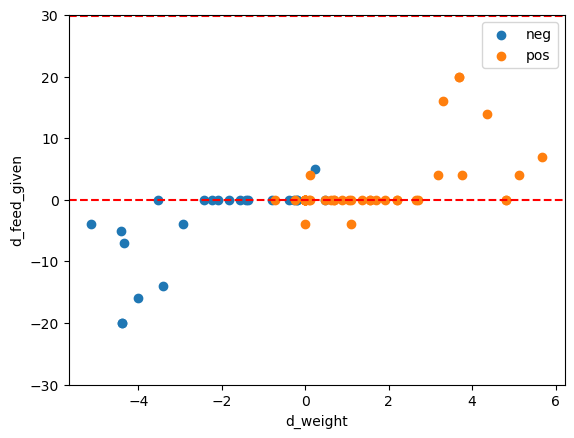

In [24]:
col = 'd_feed_given'
x = df_neg.loc[quarts, 'd_weight']
y = df_neg.loc[quarts, col]
plt.scatter(x = x, y = y, label = 'neg')
x = df_pos.loc[quarts_pos, 'd_weight']
y = df_pos.loc[quarts_pos, col]  
plt.scatter(x = x, y = y, label = 'pos')
plt.xlabel('d_weight')
plt.ylabel(col)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=29.8, color='r', linestyle='--')
plt.legend()
plt.ylim([-30, 30])
plt.savefig(f'feature_investigation/d_weight_{col}_square.png')
plt.show()